# Task 2

This code was written while using github Copilot.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models
from keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from PIL import Image


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Checking the shape of the data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Here are the classes from the CIFAR-10 dataset. Dog is index 5.
# Information about the classes can be found at https://www.cs.toronto.edu/~kriz/cifar.html
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Change the answer data to check if the answer is a dog or not
def dogify(y):
    for i in range(len(y)):
        if y[i] == 5:
            y[i] = 1
        else:
            y[i] = 0
    return y

In [6]:
dogify(y_train)
dogify(y_test)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [7]:
# Figuring out the max value of the pixel values in the dataset
print("Max pixel value:", np.max(x_train))
print("Min pixel value:", np.min(x_train))

Max pixel value: 255
Min pixel value: 0


In [8]:
# Normalizing the pixel values to be between 0 and 1
x_train = x_train/255
x_test = x_test/255

The CNN-model have several layers.
The input layer indicates the shape of the input. In this case pictures with 32x32 pixels with rbg-values.
The convonutional layer creates filters that is supposed to classify features. In this case the first convonutional
layer creates 32 filters for each 3x3 square, while the next 2 create 64 filters for each square. 
The stride length is 1 by default. The pooling layer looks at every value in a 2x2 square an 
gives the highest value. Here the stride length is 2, as the default is the same as the pooling value. 
The flatteneing layer changes the data to be 1 dimensional for the fully connected layers at the end.
The first layer have 64 neurons connected to the 2 neurons at the end.

The logic for adding more filters in the later convonutional layers are that the features detected in the later part of the model are more complex, while in the earlier part its easier features like edges or colour changes. 

In [ ]:
# Creating the CNN model
model= models.Sequential([
    Input(shape=(32, 32, 3)), # Input layer, shape found earlier
    layers.Conv2D(32, (3, 3), activation='relu'), # First convolutional layer
    layers.MaxPooling2D((2, 2)), # First pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer
    layers.MaxPooling2D((2, 2)), # Second pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'), # Third convolutional layer
    layers.Flatten(), # Flattening the data to feed into the dense layer
    layers.Dense(64, activation='relu'), # Dense layer with 64 neurons
    layers.Dense(2, activation='sigmoid') # Output layer with 2 neurons (dog or not dog)
])

This dataset is inbalanced. It has equal number of pictures of each category, but dog is only one of 10 the categories. This means that only one tenth of the pictures are of dogs.

In [10]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train.flatten())
class_weights_dict = dict(zip([0, 1], class_weights))
print(class_weights_dict)

{0: 0.5555555555555556, 1: 5.0}


In [ ]:
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', # This loss function worked better than 'binary_crossentropy'.
              metrics=['accuracy'])

# Train the model with class weights
training = model.fit(x_train, y_train, epochs=10,
           validation_data=(x_test, y_test),
           class_weight=class_weights_dict)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5671 - loss: 0.6194 - val_accuracy: 0.8216 - val_loss: 0.3554
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7536 - loss: 0.4581 - val_accuracy: 0.8698 - val_loss: 0.3085
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7910 - loss: 0.4102 - val_accuracy: 0.8612 - val_loss: 0.3001
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8010 - loss: 0.3900 - val_accuracy: 0.7520 - val_loss: 0.4784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8163 - loss: 0.3688 - val_accuracy: 0.7972 - val_loss: 0.4216
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8228 - loss: 0.3449 - val_accuracy: 0.8498 - val_loss: 0.3435
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8390 - loss: 0.3279 - val_accuracy: 0.8339 - val_loss: 0.3513
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8519 -

I used activation sigmoid with sparse_categorical_crossentropy as this is the combination that worked best during 
my testing. It is unclear as to why this proved to be the best combination. I tested several combination with softmax, sigmoid, sparse_categorical_crossentropy, binary_crossentropy, 1 neuron in the final layer and 2 neurons in the final layer.

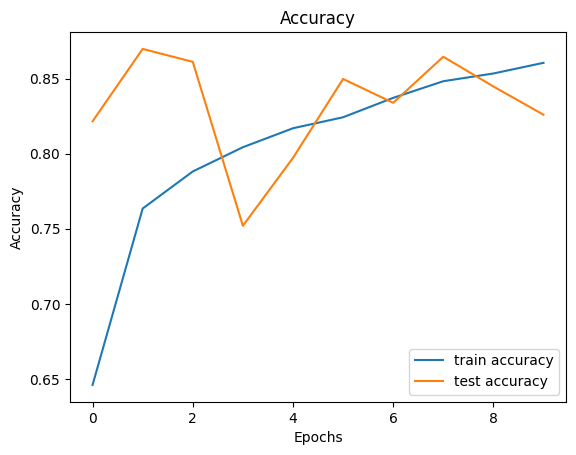

In [12]:
# Plotting the training and validation accuracy and loss
plt.plot(training.history['accuracy'], label='train accuracy')
plt.plot(training.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The flattenning of the train accuracy curve shows that 10 epochs is enough for this model

In [13]:
# Predicting the test set
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [14]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[7417 1583]
 [ 157  843]]


In [ ]:
#Checking if the model can correctly identify a dog
def check_if_dog(file):
    dog=Image.open(file)
    plt.imshow(dog)
    dog = dog.convert("RGB")
    dog = dog.resize((32, 32))
    dog = np.array(dog)
    dog = dog/255
    dog = np.expand_dims(dog, axis=0)
    dog_pred = model.predict(dog)
    print("Is dog?", np.argmax(dog_pred, axis=1)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Is dog? 1


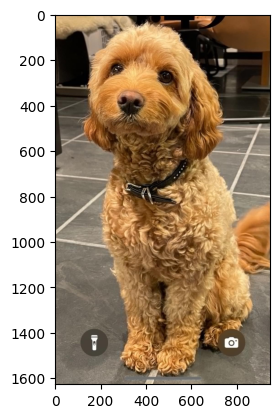

In [21]:
check_if_dog("Dog1.jpg")

It correcly guessed that this was a dog